# 기본적인 인포머 훈련 및 예측

## Download code and dataset

In [1]:
!git clone https://github.com/zhouhaoyi/Informer2020.git
!git clone https://github.com/zhouhaoyi/ETDataset.git
!ls

Cloning into 'Informer2020'...
remote: Enumerating objects: 556, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 556 (delta 9), reused 11 (delta 4), pack-reused 535
Receiving objects: 100% (556/556), 6.48 MiB | 9.82 MiB/s, done.
Resolving deltas: 100% (315/315), done.
Cloning into 'ETDataset'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (187/187), done.
remote: Compressing objects: 100% (184/184), done.
remote: Total 187 (delta 66), reused 13 (delta 2), pack-reused 0
Receiving objects: 100% (187/187), 3.85 MiB | 10.09 MiB/s, done.
Resolving deltas: 100% (66/66), done.
ETDataset  Informer2020  sample_data


In [2]:
import sys
if not 'Informer2020' in sys.path:
    sys.path += ['Informer2020']

In [ ]:
# !pip install -r ./Informer2020/requirements.txt

## Experiments: Train and Test

In [71]:
from utils.tools import dotdict
from exp.exp_informer import Exp_Informer
import torch

In [72]:
args = dotdict()

args.model = 'informer' # model of experiment, options: [informer, informerstack, informerlight(TBD)]

args.data = 'custom' # data
args.root_path = './ETDataset/ETT-small/' # root path of data file
args.data_path = 'ETTh1.csv' # data file
args.features = 'M' # forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate
args.target = 'OT' # target feature in S or MS task
args.freq = 'h' # freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h
args.checkpoints = './informer_checkpoints' # location of model checkpoints

args.seq_len = 96 # input sequence length of Informer encoder
args.label_len = 48 # start token length of Informer decoder
args.pred_len = 24 # prediction sequence length
# Informer decoder input: concat[start token series(label_len), zero padding series(pred_len)]

args.enc_in = 7 # encoder input size
args.dec_in = 7 # decoder input size
args.c_out = 7 # output size
args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers = 2 # num of encoder layers
args.d_layers = 1 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.do_predict= True # 이걸로 예측한다!
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 'h'

args.batch_size = 32 
args.learning_rate = 0.0001
args.loss = 'mse'
args.lradj = 'type1'
args.use_amp = False # whether to use automatic mixed precision training

args.num_workers = 0
args.itr = 1
args.train_epochs = 6
args.patience = 3
args.des = 'exp'
args.inverse = True # 이걸로 standardscaler 되돌려 놓는다!

args.use_gpu = True if torch.cuda.is_available() else False
args.gpu = 0

args.use_multi_gpu = False
args.devices = '0,1,2,3'


In [73]:
print('Args in experiment:')
print(args)

Args in experiment:
{'model': 'informer', 'data': 'custom', 'root_path': './ETDataset/ETT-small/', 'data_path': 'ETTh1.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'checkpoints': './informer_checkpoints', 'seq_len': 96, 'label_len': 48, 'pred_len': 24, 'enc_in': 7, 'dec_in': 7, 'c_out': 7, 'factor': 5, 'd_model': 512, 'n_heads': 8, 'e_layers': 2, 'd_layers': 1, 'd_ff': 2048, 'dropout': 0.05, 'attn': 'prob', 'embed': 'timeF', 'activation': 'gelu', 'do_predict': True, 'distil': True, 'output_attention': False, 'mix': True, 'padding': 0, 'batch_size': 32, 'learning_rate': 0.0001, 'loss': 'mse', 'lradj': 'type1', 'use_amp': False, 'num_workers': 0, 'itr': 1, 'train_epochs': 6, 'patience': 3, 'des': 'exp', 'inverse': True, 'use_gpu': True, 'gpu': 0, 'use_multi_gpu': False, 'devices': '0,1,2,3'}


In [74]:
Exp = Exp_Informer

In [75]:
for ii in range(args.itr):
    # setting record of experiments
    setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}_{}'.format(args.model, args.data, args.features, 
                args.seq_len, args.label_len, args.pred_len,
                args.d_model, args.n_heads, args.e_layers, args.d_layers, args.d_ff, args.attn, args.factor, args.embed, args.distil, args.mix, args.des, ii)

    # set experiments
    exp = Exp(args)
    
    # train
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp.train(setting)
    
    # test
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.test(setting)

    torch.cuda.empty_cache()


# 기본 훈련에서는 train,val,test가 train 8521, val 2857, test 2857로 세팅돼있다.
# data_loader.py -> 50번 줄부터

Use GPU: cuda:0
>>>>>>>start training : informer_custom_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 12075
val 1719
test 3461
	iters: 100, epoch: 1 | loss: 6.3213391
	speed: 0.2921s/iter; left time: 631.8937s
	iters: 200, epoch: 1 | loss: 7.2662063
	speed: 0.2927s/iter; left time: 603.8250s
	iters: 300, epoch: 1 | loss: 4.7665181
	speed: 0.2920s/iter; left time: 573.2621s
Epoch: 1 cost time: 110.3998966217041
Epoch: 1, Steps: 377 | Train Loss: 7.9723129 Vali Loss: 7.7361536 Test Loss: 9.6443110
Validation loss decreased (inf --> 7.736154).  Saving model ...
Updating learning rate to 0.0001
	iters: 100, epoch: 2 | loss: 4.5719781
	speed: 0.6356s/iter; left time: 1135.1664s
	iters: 200, epoch: 2 | loss: 4.8027492
	speed: 0.2920s/iter; left time: 492.3668s
	iters: 300, epoch: 2 | loss: 4.8237834
	speed: 0.2919s/iter; left time: 462.9497s
Epoch: 2 cost time: 110.04831027984619
Epoch: 2, Steps: 377 | Train Loss: 4.5828814

## 훈련 결과 Visualization

In [84]:
setting = 'informer_custom_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0'

In [85]:
# When we finished exp.train(setting) and exp.test(setting), we will get a trained model and the results of test experiment
# The results of test experiment will be saved in ./results/{setting}/pred.npy (prediction of test dataset) and ./results/{setting}/true.npy (groundtruth of test dataset)
import numpy as np

preds = np.load('./results/'+setting+'/pred.npy')
trues = np.load('./results/'+setting+'/true.npy')

# [samples, pred_len, dimensions]
preds.shape, trues.shape

((3456, 24, 7), (3456, 24, 7))

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

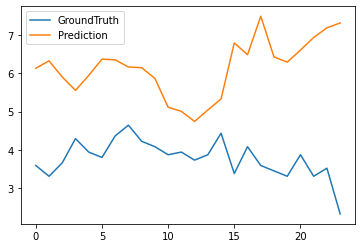

In [87]:
# draw OT prediction
# [:,:,:]의 마지막 요소가 컬럼이다.

plt.figure()
plt.plot(trues[3,:,-1], label='GroundTruth')
plt.plot(preds[3,:,-1], label='Prediction')
plt.legend()
plt.show()

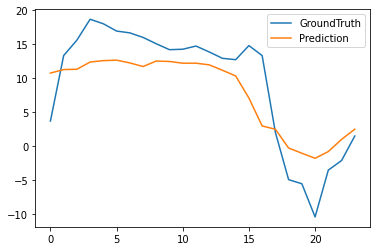

In [88]:
# draw HUFL prediction
plt.figure()
plt.plot(trues[0,:,0], label='GroundTruth')
plt.plot(preds[0,:,0], label='Prediction')
plt.legend()
plt.show()

## 모든 요소 그려보기

In [89]:
preds = np.load('./results/'+setting+'/pred.npy')
trues = np.load('./results/'+setting+'/true.npy')

# [samples, pred_len, dimensions]
preds.shape, trues.shape

((3456, 24, 7), (3456, 24, 7))

In [90]:
# 뽑아내서 쫙 그려보자.

preds[:,:,0]

array([[10.753482  , 11.268073  , 11.316538  , ..., -0.8151827 ,
         0.97532654,  2.481532  ],
       [11.838069  , 11.915968  , 11.845488  , ...,  0.54918814,
         3.8468134 ,  6.056818  ],
       [13.220034  , 12.989689  , 12.815704  , ...,  4.8287477 ,
         8.246002  ,  9.978759  ],
       ...,
       [-7.877472  ,  0.08047915,  2.196879  , ..., -5.280548  ,
        -5.6542473 , -6.0845413 ],
       [-6.234235  ,  4.205138  ,  6.669962  , ..., -5.6530714 ,
        -5.405593  , -5.068903  ],
       [-6.109     ,  4.718479  ,  4.943596  , ..., -6.1535006 ,
        -5.1210623 , -4.249954  ]], dtype=float32)

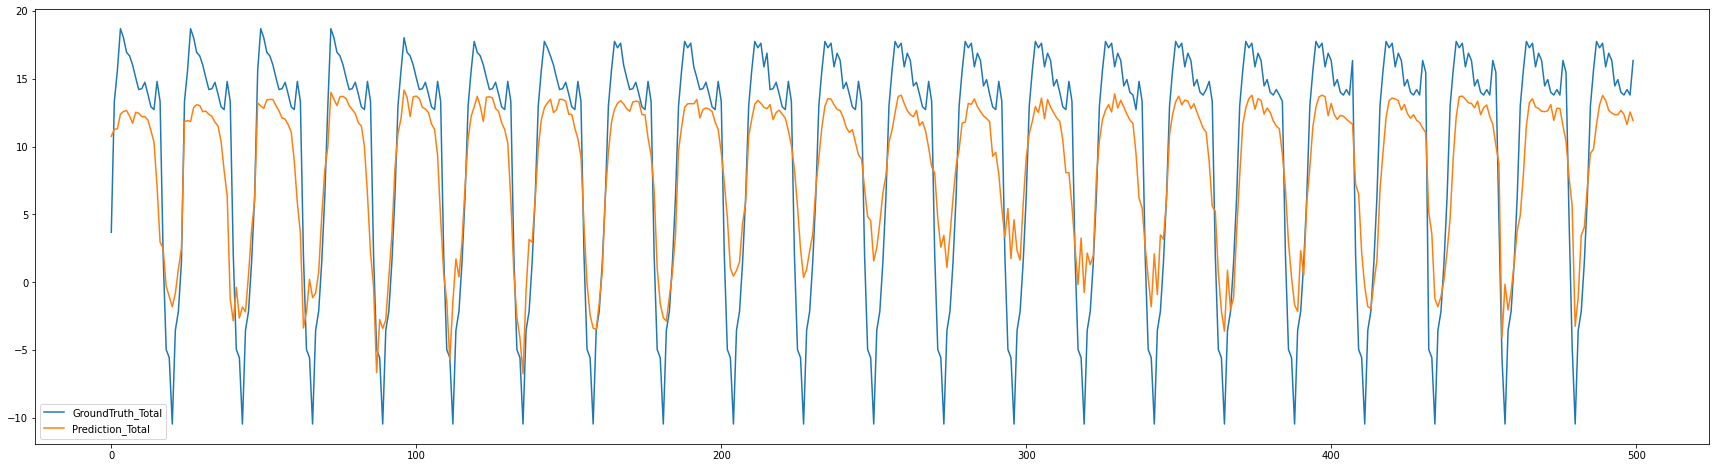

In [102]:
preds_total = preds[:,:,0].reshape(-1)
trues_total = trues[:,:,0].reshape(-1)

plt.figure(figsize=(30,8))
plt.plot(trues_total[:500], label='GroundTruth_Total')
plt.plot(preds_total[:500], label='Prediction_Total')
plt.legend()
plt.show()

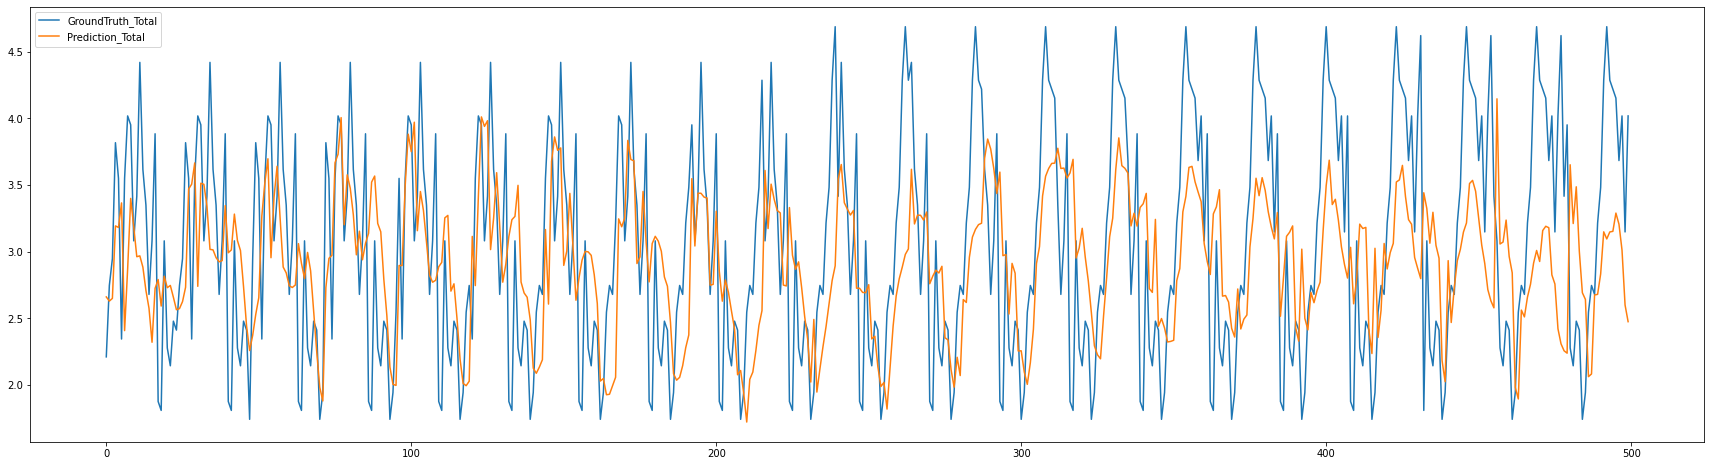

In [103]:
preds_total = preds[:,:,1].reshape(-1)
trues_total = trues[:,:,1].reshape(-1)

plt.figure(figsize=(30,8))
plt.plot(trues_total[:500], label='GroundTruth_Total')
plt.plot(preds_total[:500], label='Prediction_Total')
plt.legend()
plt.show()

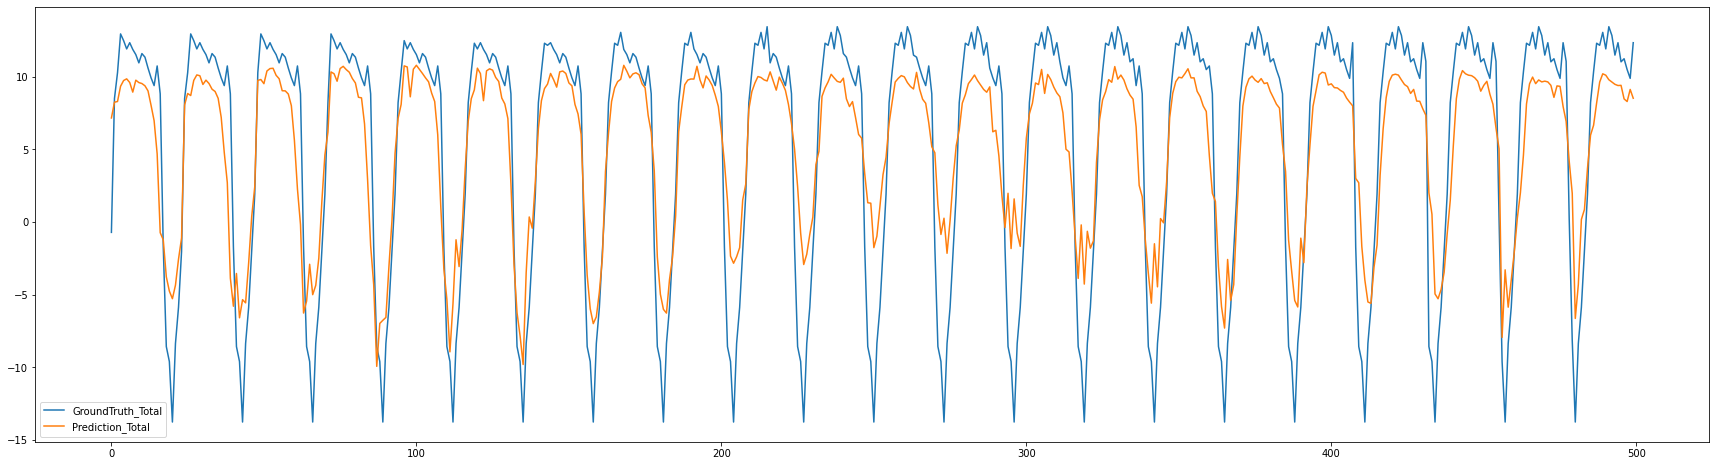

In [104]:
preds_total = preds[:,:,2].reshape(-1)
trues_total = trues[:,:,2].reshape(-1)

plt.figure(figsize=(30,8))
plt.plot(trues_total[:500], label='GroundTruth_Total')
plt.plot(preds_total[:500], label='Prediction_Total')
plt.legend()
plt.show()

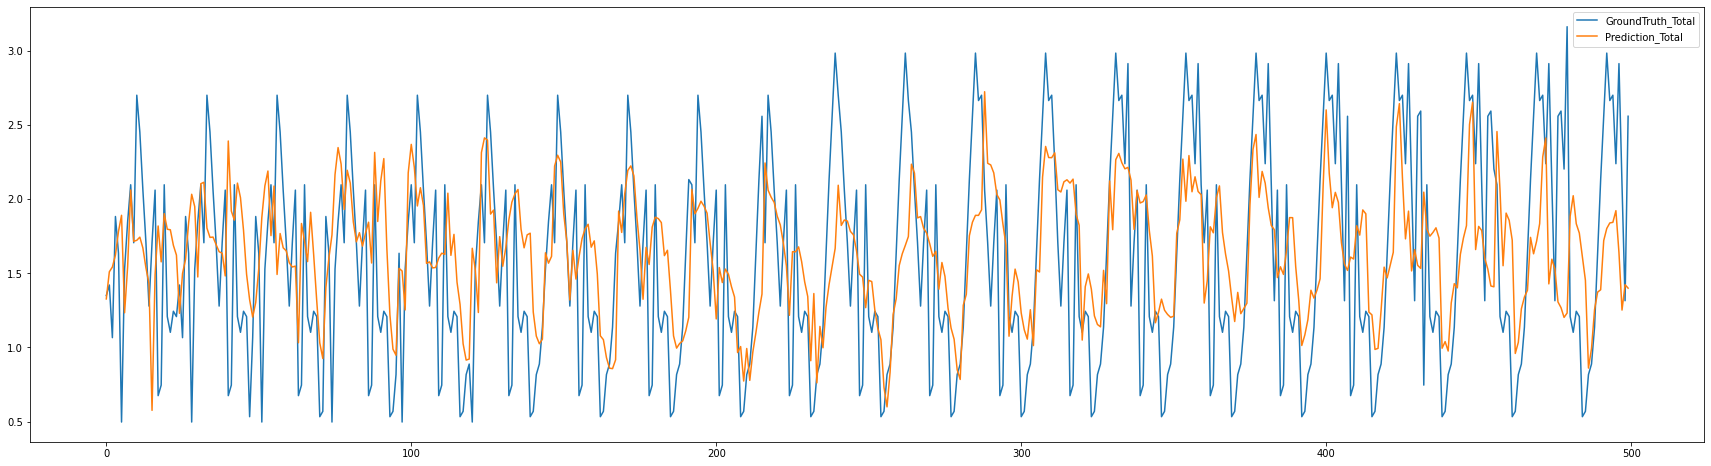

In [105]:
preds_total = preds[:,:,3].reshape(-1)
trues_total = trues[:,:,3].reshape(-1)

plt.figure(figsize=(30,8))
plt.plot(trues_total[:500], label='GroundTruth_Total')
plt.plot(preds_total[:500], label='Prediction_Total')
plt.legend()
plt.show()

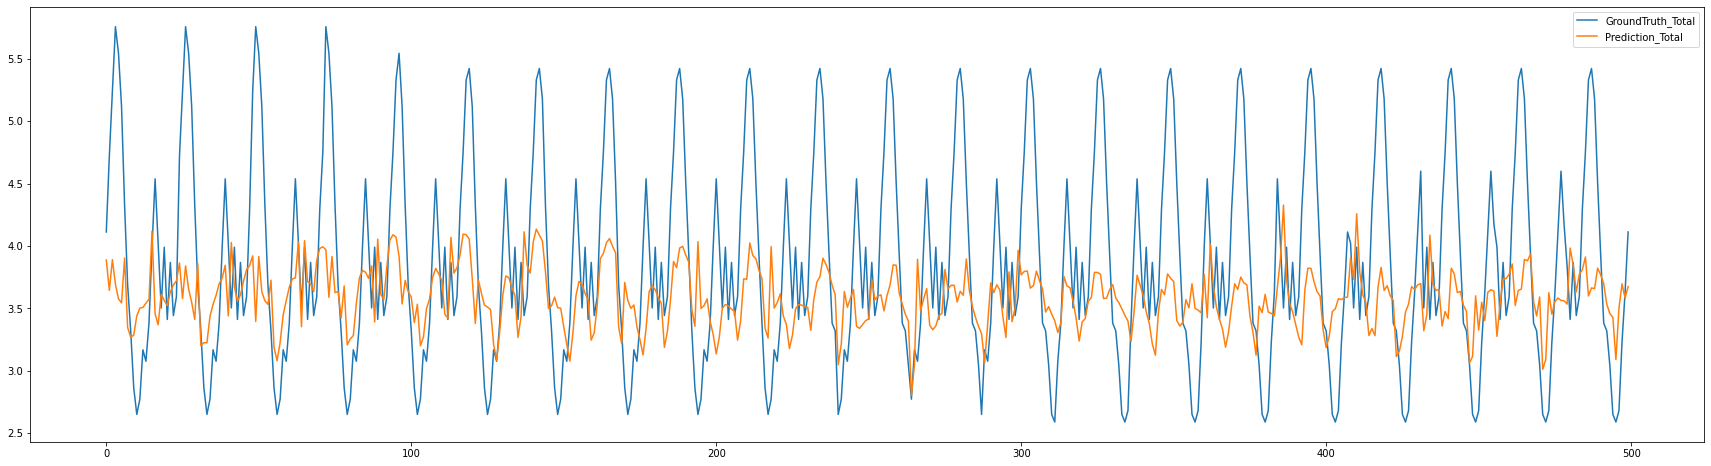

In [106]:
preds_total = preds[:,:,4].reshape(-1)
trues_total = trues[:,:,4].reshape(-1)

plt.figure(figsize=(30,8))
plt.plot(trues_total[:500], label='GroundTruth_Total')
plt.plot(preds_total[:500], label='Prediction_Total')
plt.legend()
plt.show()

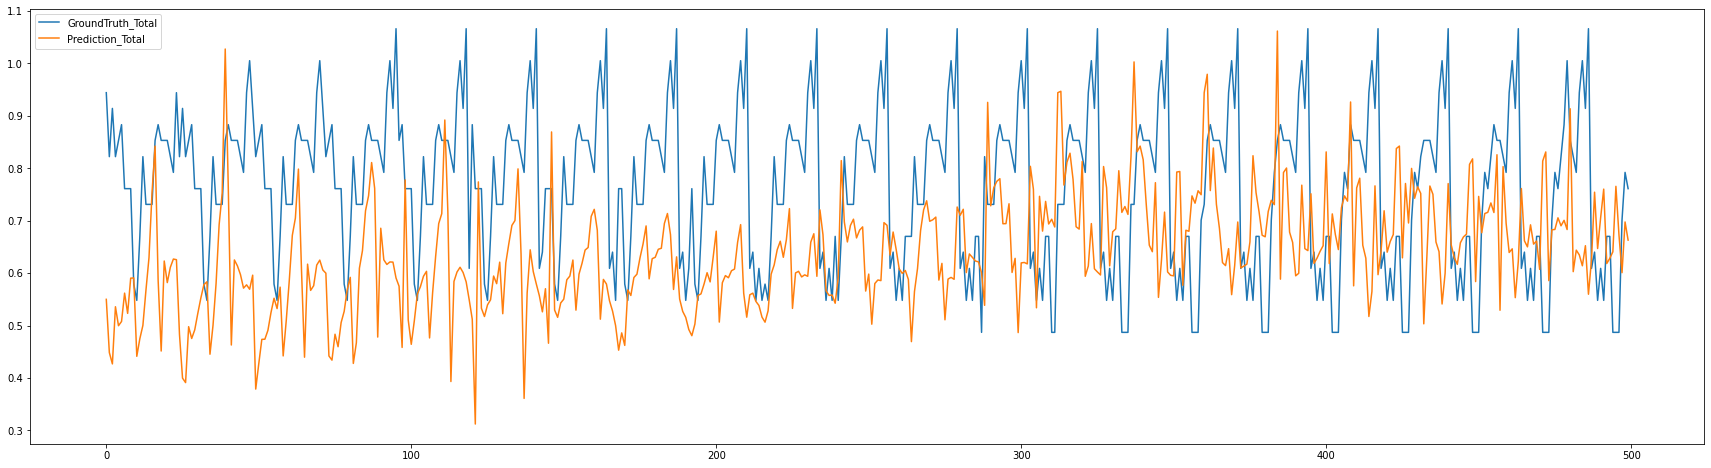

In [107]:
preds_total = preds[:,:,5].reshape(-1)
trues_total = trues[:,:,5].reshape(-1)

plt.figure(figsize=(30,8))
plt.plot(trues_total[:500], label='GroundTruth_Total')
plt.plot(preds_total[:500], label='Prediction_Total')
plt.legend()
plt.show()

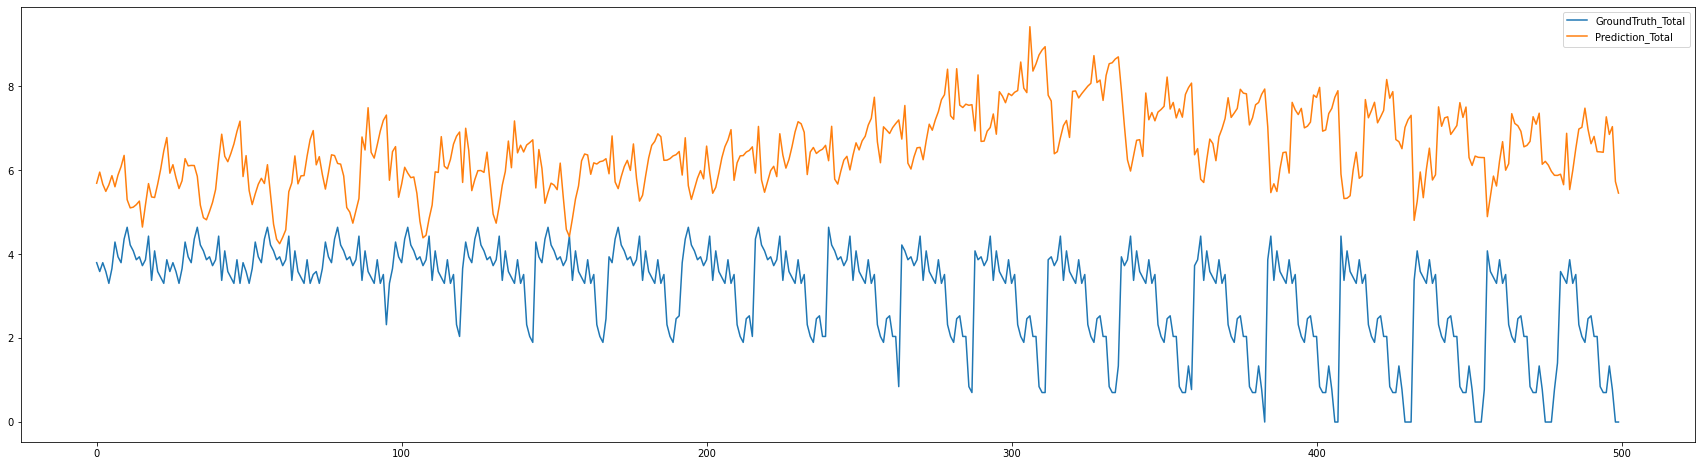

In [108]:
preds_total = preds[:,:,6].reshape(-1)
trues_total = trues[:,:,6].reshape(-1)

plt.figure(figsize=(30,8))
plt.plot(trues_total[:500], label='GroundTruth_Total')
plt.plot(preds_total[:500], label='Prediction_Total')
plt.legend()
plt.show()

# 개판이다!!!